<a href="https://colab.research.google.com/github/dderyashn/MNIST-Classification-with-CNN/blob/main/MNIST_Classification_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.models import Model
from keras.layers import Flatten, Dropout
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
import random 

In [31]:
#For repeatable results
np.random.seed(0) 

In [32]:
#Loading the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [33]:
#There are 60000 images in our train data and same for the test data
#The number of labels should equal to the number of images, so we have to check that
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [34]:
assert(X_train.shape[0] == y_train.shape[0]), "Error: The number of train images is not equal to the number of labels"
assert(X_test.shape[0] == y_test.shape[0]), "Error: The number of test images is not equal to the number of labels"
assert(X_train.shape[1:] == (28,28)), "Error: The dimensions of the train images should be equal to 28x28"
assert(X_test.shape[1:] == (28,28)), "Error: The dimensions of the test images should be equal to 28x28"

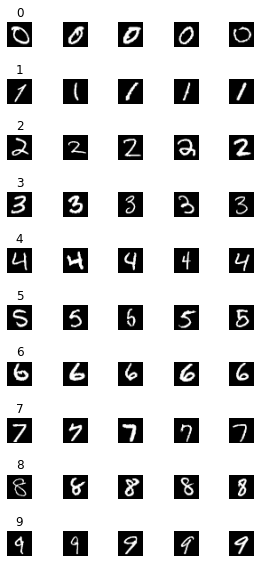

In [35]:
#Plotting the data: We can visualize our data 
sample_number = []
columns = 5 #Random set of 5 images from each of the categories
classes_number = 10 #Since there are 10 number from 0 to 9

fig, axis = plt.subplots(nrows = classes_number, ncols = columns, figsize = (4,8))
fig.tight_layout() #Avoid overlap

#Looping through every column and iterating through every row
for i in range(columns):
  for j in range(classes_number):
    x_selected = X_train[y_train == j] #Filtering out the images which don't belong to that class
    axis[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap = plt.get_cmap("gray"))
    axis[j][i].axis("off") #Making images appearing without labeled axis
    if i == 0:
      axis[j][i].set_title(str(j)) #Setting title for each class
      sample_number.append(len(x_selected))
       
    

In [36]:
#To see the amount of images in each class
print(sample_number)

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of Images')

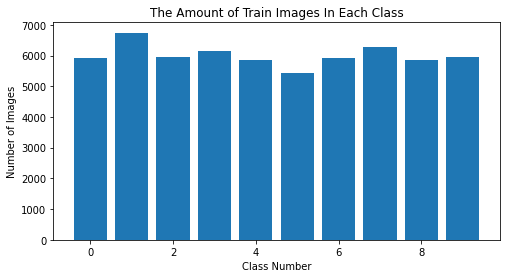

In [37]:
plt.figure(figsize = (8,4))
plt.bar(range(0, classes_number), sample_number) 
plt.title("The Amount of Train Images In Each Class")
plt.xlabel("Class Number")
plt.ylabel("Number of Images")

In [38]:
#Reshaping the data and adding depth information to make our data to be used as input for the convolutional layer
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [39]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

X_train = X_train/255
X_test = X_test/255

In [40]:
def leNet_model():
  model = Sequential()
  model.add(Conv2D(30, (5,5), input_shape = (28,28,1), activation = 'relu'))
  model.add(MaxPooling2D(pool_size = (2,2)))

  model.add(Conv2D(15, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size = (2,2)))

  model.add(Flatten())
  model.add(Dense(500, activation = 'relu'))
  model.add(Dropout(0.5))
  model.add(Dense(classes_number, activation = 'softmax'))
  model.compile(Adam(lr = 0.01), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

model = leNet_model()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               188000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)              

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [41]:
history = model.fit(X_train, y_train, epochs = 10, validation_split = 0.1, batch_size = 400, verbose = 1, shuffle = 1)

Epoch 1/10
135/135 [==============================] - 31s 229ms/step - loss: 0.2476 - accuracy: 0.9224 - val_loss: 0.0507 - val_accuracy: 0.9840
Epoch 2/10
135/135 [==============================] - 31s 227ms/step - loss: 0.0715 - accuracy: 0.9781 - val_loss: 0.0586 - val_accuracy: 0.9807
Epoch 3/10
135/135 [==============================] - 31s 227ms/step - loss: 0.0574 - accuracy: 0.9824 - val_loss: 0.0421 - val_accuracy: 0.9868
Epoch 4/10
135/135 [==============================] - 31s 227ms/step - loss: 0.0484 - accuracy: 0.9840 - val_loss: 0.0425 - val_accuracy: 0.9865
Epoch 5/10
135/135 [==============================] - 31s 226ms/step - loss: 0.0459 - accuracy: 0.9853 - val_loss: 0.0570 - val_accuracy: 0.9820
Epoch 6/10
135/135 [==============================] - 30s 226ms/step - loss: 0.0407 - accuracy: 0.9871 - val_loss: 0.0438 - val_accuracy: 0.9885
Epoch 7/10
135/135 [==============================] - 30s 226ms/step - loss: 0.0421 - accuracy: 0.9870 - val_loss: 0.0428 - val_ac

Text(0.5, 0, 'Epoch')

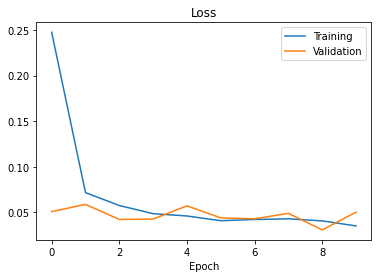

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Loss')
plt.xlabel('Epoch')

Text(0.5, 1.0, 'Epoch')

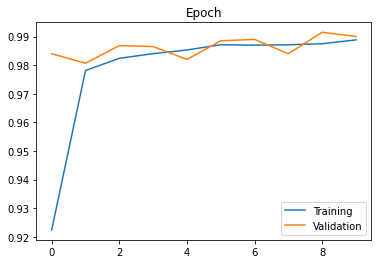

In [43]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')
plt.title('Epoch')

In [44]:
score = model.evaluate(X_test, y_test, verbose = 0)

print('Test score: ', score[0])
print('Test accuracy: ', score[1])

Test score:  0.044439103454351425
Test accuracy:  0.9876000285148621


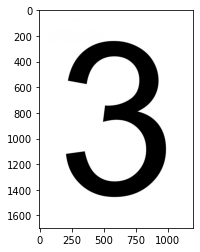

In [45]:
import requests
from PIL import Image

url = 'https://printables.space/files/uploads/download-and-print/large-printable-numbers/3-a4-1200x1697.jpg'
response = requests.get(url, stream = True)
img = Image.open(response.raw)
plt.imshow(img, cmap = plt.get_cmap('gray'))

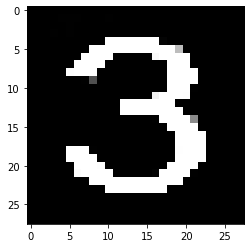

In [46]:
import cv2

img = np.asarray(img)
img = cv2.resize(img, (28,28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))

In [58]:
img = img/255
img = img.reshape(1, 28, 28, 1)

In [60]:
prediction = np.argmax(model.predict(img), axis=-1)
print("Predicted number: ", str(prediction))

Predicted number:  [3]


In [61]:
layer1 = Model(inputs = model.layers[0].input, outputs = model.layers[0].output)
layer2 = Model(inputs = model.layers[0].input, outputs = model.layers[2].output)

visual_layer1, visual_layer2 = layer1.predict(img), layer2.predict(img)

print(visual_layer1.shape)
print(visual_layer2.shape)

(1, 24, 24, 30)
(1, 10, 10, 15)


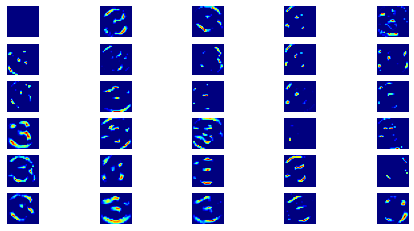

In [63]:
#Visualization of the features extracted by each of the 3 filters, using jet color map
plt.figure(figsize = (8,4))
for i in range(30):
  plt.subplot(6, 5, i+1)
  plt.imshow(visual_layer1[0, :, :, i], cmap = plt.get_cmap('jet'))
  plt.axis('off')

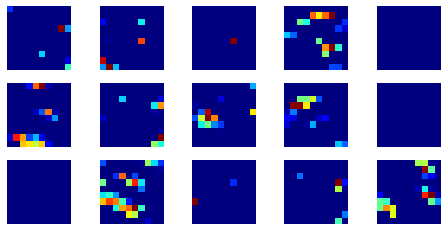

In [64]:
plt.figure(figsize = (8,4))
for i in range(15):
  plt.subplot(3, 5, i+1)
  plt.imshow(visual_layer2[0, :, :, i], cmap = plt.get_cmap('jet'))
  plt.axis('off')